# Performance Test

In [23]:
import numpy as np
import math
from itertools import product
import matplotlib.pyplot as plt
import re
import objectives
import dataprofile

In [7]:
## Files names in Result folder (Data generated using MANSO) 


P = 10 ## number of problems or versions of objective functions created by adding Gaussian noise with different seeds.


## seeds in these names are redundant (the script will look for seeds ranging from 1 to P for each version of MANSO and objective)

Branin= ["Branin_ASTRODF_seed_3_D_2_b_0.1_omega_0.5_n0_10_Ob_50_B_10000.npy",
         "Branin_ASTRODF_seed_3_D_2_b_0.1_omega_0.05_n0_10_Ob_50_B_10000.npy",
         "Branin_ASTRODF_seed_3_D_2_b_0.4_omega_0.05_n0_10_Ob_50_B_10000.npy","data10"]

Shek4=["Shekel_ASTRODF_seed_1_D_4_b_0.1_omega_0.5_n0_5_Ob_20_B_10000.npy",
       "Shekel_ASTRODF_seed_1_D_4_b_0.1_omega_0.5_n0_10_Ob_20_B_10000.npy","data5","data10"]

Shek10=["Shekel_ASTRODF_seed_1_D_10_b_0.1_omega_0.5_n0_5_Ob_100_B_60000.npy",
        "Shekel_ASTRODF_seed_1_D_10_b_0.1_omega_0.25_n0_5_Ob_100_B_60000.npy","data5"]
        
Shek6=["Shekel_ASTRODF_seed_1_D_6_b_0.1_omega_0.5_n0_5_Ob_200_B_40000.npy",
        "Shekel_ASTRODF_seed_1_D_6_b_0.1_omega_0.05_n0_5_Ob_200_B_40000.npy",
        "Shekel_ASTRODF_seed_1_D_6_b_0.1_omega_0.05_n0_10_Ob_200_B_40000.npy","data5","data10"]

Shek8= ["Shekel_ASTRODF_seed_1_D_8_b_0.1_omega_0.5_n0_5_Ob_200_B_40000.npy",
        "Shekel_ASTRODF_seed_1_D_8_b_0.1_omega_0.05_n0_5_Ob_200_B_40000.npy",
        "Shekel_ASTRODF_seed_1_D_8_b_0.1_omega_0.05_n0_10_Ob_200_B_40000.npy","data5","data10"]

## Data profile generator

In [8]:
path="Results/" #- (profiles will be saved in path/Profile )

problem="Branin"#"Shek8"#"Shek6"##Branin
if problem[0:4]=="Bran":
        randfun="Branin"
        d=int(re.split('D|b|Ob|B|omega|n0|_',globals()[problem][0][22:-4])[2])
        Tru_min = [[-np.pi, 12.275],[np.pi, 2.275], [9.42478, 2.475]]
        tol1= 10e-4
        l=4000
        n0=int(re.split('D|b|Ob|B|omega|n0|_',globals()[problem][0][22:-4])[11])
        trfun="branind"
        
elif problem[0:4]=="Shek":
        randfun="Shekel"
        d=int(re.split('D|b|Ob|B|omega|n0|_',globals()[problem][0][22:-4])[2])
        Tru_min=np.array([[4.0]*d,[1.0]*d,[8.0]*d,[6.0]*d,[3.0,7.0]*int(d/2),[2.0,9.0]*int(d/2),
                                  [5.0,3.0]*int(d/2),[8.0,1.0]*int(d/2),[6.0,2.0]*int(d/2),[7.0,3.6]*int(d/2)])
        tol1= 10e-5 #10**(-3*6/4)
        l=10000
        trfun='shekeltr'

profile=[]
for k,t in enumerate(globals()[problem]):
    if t[0:4] =="data":
        #data= randShekel(80000,d,100,10)
        n0=int(re.split('data',t)[1])
        data= getattr(dataprofile,"rand"+randfun)(60000,n0,d,200,P)
    else:
        data=[]
        feval=[]
        for it in range(P):
            name=re.split('seed|D_',t)
            fname=name[0]+"seed_"+str(it+1)+"_D_"+name[2]
            fevname=name[0]+"seed_"+str(it+1)+"_ND_"+name[2]
            fneval=np.array([int(x) for x in np.load(path+fevname,allow_pickle=True)[0]])
            feval.append(fneval)
            datadum=np.load(path+fname,allow_pickle=True)[0]
            for it,neval in enumerate(fneval):
                if it==0:
                    #print(np.tile(datadum[it],(neval,1)))
                    datasp=np.tile(datadum[it],(neval,1))
                else:
                    datasp=np.append(datasp,np.tile(datadum[it],(neval,1)),axis=0)
            data.append(datasp)
    for trumin in Tru_min:
        profile.append(dataprofile.Performance_test(data,feval,d,trfun,trumin,P,0.1,tol1,l))#Shekel 0.5,.005# Branin shekeltr
np.save(path+"Profile/"+problem+str(round(tol1,5))+"Profile.npy",profile)

0.26761861742291565
[690, 5898, 5806, 1953, 1576, 1352, 828, 3148, 606, 254]
0.26761861742291565
[1818, 381, 901, 4798, 2998, 2241, 768, 1215, 314, 174]
0.26761861742291565
[5263, 2336, 3706, 1691, 3133, 2738, 1458, 229, 943, 3882]
0.26761861742291565
[690, 7537, 2363, 1707, 1576, 1352, 828, 4558, 606, 254]
0.26761861742291565
[1635, 381, 901, 1805, 1768, 2302, 768, 1177, 314, 174]
0.26761861742291565
[3393, 1915, 3511, 2210, 1826, 2064, 1458, 229, 943, 1727]
0.26761861742291565
[690, 8597, 2417, 1717, 1446, 1352, 1218, 4568, 606, 254]
0.26761861742291565
[1705, 381, 901, 1815, 1799, 2682, 768, 1177, 314, 174]
0.26761861742291565
[3779, 2034, 3660, 2210, 1857, 2444, 1777, 229, 943, 1797]
0.26761861742291565
[3200, 20810, 52440, 3940, 1570, 840, 13360, 37800, 9800, 11710]
0.26761861742291565
[2760, 6720, 45870, 2400, 1250, 19050, 21990, 460, 16090, 7060]
0.26761861742291565
[3390, 6270, 790, 3040, 160, 30090, 22220, 4790, 9350, 9770]


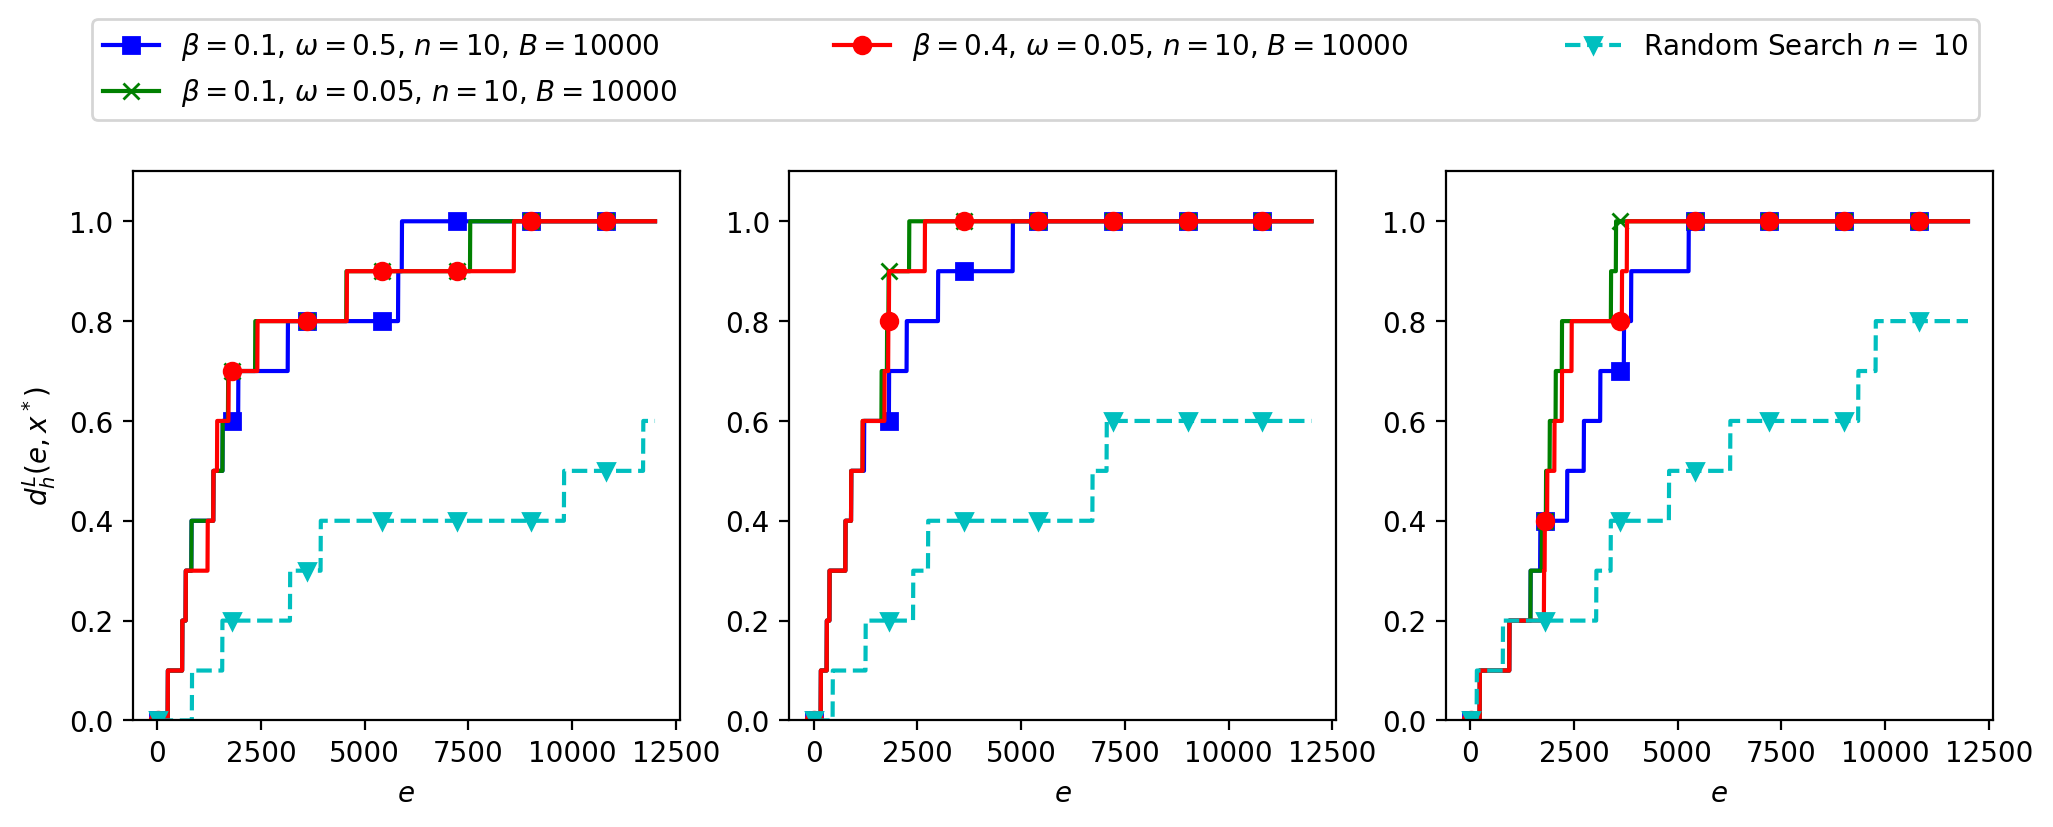

In [38]:
path="Results/" ## Profile path
problem="Branin"#Shek10"#"Shek6"#"Shek10"
if problem[0:4]=="Bran":
        randfun="Branin"
        d=int(re.split('D|b|Ob|B|omega|n0|_',globals()[problem][0][22:-4])[2])
        Tru_min = [[-np.pi, 12.275],[np.pi, 2.275], [9.42478, 2.475]]
        tol1= 10e-4
        l=4000
        n0=int(re.split('D|b|Ob|B|omega|n0|_',globals()[problem][0][22:-4])[11]) 
        cl=3
        bbbox=(-0.1, 1.2, 3.5, .102)
        
elif problem[0:4]=="Shek":
        randfun="Shekel"
        d=int(re.split('D|b|Ob|B|omega|n0|_',globals()[problem][0][22:-4])[2])
        Tru_min=np.array([[4.0]*d,[1.0]*d,[8.0]*d,[6.0]*d,[3.0,7.0]*int(d/2),[2.0,9.0]*int(d/2),
                                  [5.0,3.0]*int(d/2),[8.0,1.0]*int(d/2),[6.0,2.0]*int(d/2),[7.0,3.6]*int(d/2)])
        tol1= 10e-5 #10**(-3*6/4)
        l=10000
        cl=5
        bbbox=(-0.4, 1.2, 6., .102)
        
        
d=int(re.split('D|b|Ob|B|omega|n0|_',globals()[problem][0][22:-4])[2])
profile=np.load(path+"Profile/"+problem+str(round(tol1,5))+"Profile.npy",allow_pickle=True)
if problem[0:4]=="Bran":
    fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200)
    fac=3
    nummin=3
elif problem[0:4]=="Shek":
    fig, ax = plt.subplots(nrows=2, ncols=5,figsize=(20,6))
    fac=5
    nummin=10
    
mark=['s','x','o','v','+','p','>','<']
col=['b', 'g', 'r', 'c','y', 'k', 'w']
for k,t in enumerate(globals()[problem]):
    i=0
    #Max_Points_explored =[len(d) for d in data]
    for trumin,_ in enumerate(Tru_min):
        rho=profile[k*nummin+trumin]
        if t[0:4]=="data":
            n0=int(re.split('data',t)[1])
            lab=r"Random Search $n=$ "+str(re.split('data',t)[1])
            colo=col[k]
            marko=mark[k]
            lst='--'
        else:
            temp=str.split(t[22:-4],'_')[1:12:2]
            lab=r'$\beta=$'+str(temp[1])+', $\omega=$'+str(temp[2])+', $ n=$'+str(temp[3])+', $B=$'+str(temp[5])#$OB=$'+str(temp[4])
        #ax[0].plot(rho[1],rho[0],'C'+str(i),label=lab)
            colo=col[k]
            marko=mark[k]
            lst='-'
            #for y,o in enumerate(Max_Points_explored):
            #    ax[int(i/5),i%5].vlines(o,0,1.1,linestyles ="dotted", colors =colo)     
        #print(rho[2][1:2000])
        #plt.subplot2grid((nrows,ncols),(int(i/fac),i%fac)).plot(rho[3][1:3000]*(d+1),rho[2][1:3000],'C'+str(i),label=lab,color=colo,linestyle=lst,marker=marko,markevery=300)
        #plt.subplot2grid((nrows,ncols),(int(i/fac),i%fac)).set_ylim(0.0,1.1)
        ax[int(i/fac),i%fac].plot(rho[3][1:3000]*(d+1),rho[2][1:3000],'C'+str(i),label=lab,color=colo,linestyle=lst,marker=marko,markevery=300)
        ax[int(i/fac),i%fac].set_ylim(0.0,1.1)
        if i==0:
            ax[int(i/fac),i%fac].legend(ncol=cl, bbox_to_anchor=bbbox, loc='upper left',mode="expand")
        if int(i%fac) ==0:
            ax[int(i/fac),i%fac].set_ylabel(r'$d_h^L(e,x^*)$')
        ax[int(i/fac),i%fac].set_xlabel(r'$e$')
        i=i+1
if problem[0:4]=="Bran":
    fig.delaxes(ax.flatten()[3])
    fig.delaxes(ax.flatten()[4])
    fig.delaxes(ax.flatten()[5])
    
plt.show()